In [1]:
from load_data import cleanDS_Store
from data_loader import dataLoader, original_dataLoader, api_dataLoader
from training import train
import torch
import time

from evaluations import plotLossGraph, evaluation
from show_images import show_all_images
import os
import torch

In [12]:
from load_data import cleanDS_Store
from data_loader import dataLoader
from training import train
import torch
import time

torch.manual_seed(99)
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

full_path = './content/pixel/lips/'
base_path = full_path
cleanDS_Store(base_path)
train_loader, valid_loader, test_loader = dataLoader(base_path)

start_time = time.time()
# model_types = ['customresnet','resnet50','resnet18', 'smallcnn']
folder_name = './results/results_2024-05-15-p-train-pixel-test-canon/'
train_losses, valid_losses, model_path = train(folder_name, train_loader, valid_loader, model_type = 'resnet18', num_epochs = 50, learning_rate = 0.001, pretrained=True)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time} seconds")

elapsed_time_minutes = elapsed_time / 60

print(f"Training time: {elapsed_time_minutes:.2f} minutes")

tensor([1.], device='mps:0')
training:  128 test:  16 validation:  16
Now using:  mps
resnet18
model: resnet18
Epoch 1/50, Training Loss: 1.5408
Accuracy of the network on the validation images: 25.00%
Epoch 2/50, Training Loss: 1.4166
Accuracy of the network on the validation images: 25.00%
Epoch 3/50, Training Loss: 1.2082
Accuracy of the network on the validation images: 37.50%
Epoch 4/50, Training Loss: 1.1100
Accuracy of the network on the validation images: 56.25%
Epoch 5/50, Training Loss: 1.0532
Accuracy of the network on the validation images: 37.50%
Epoch 6/50, Training Loss: 0.9904
Accuracy of the network on the validation images: 50.00%
Epoch 7/50, Training Loss: 1.1568
Accuracy of the network on the validation images: 31.25%
Epoch 8/50, Training Loss: 1.1923
Accuracy of the network on the validation images: 31.25%
Epoch 9/50, Training Loss: 1.0797
Accuracy of the network on the validation images: 50.00%
Epoch 10/50, Training Loss: 1.1268
Accuracy of the network on the vali

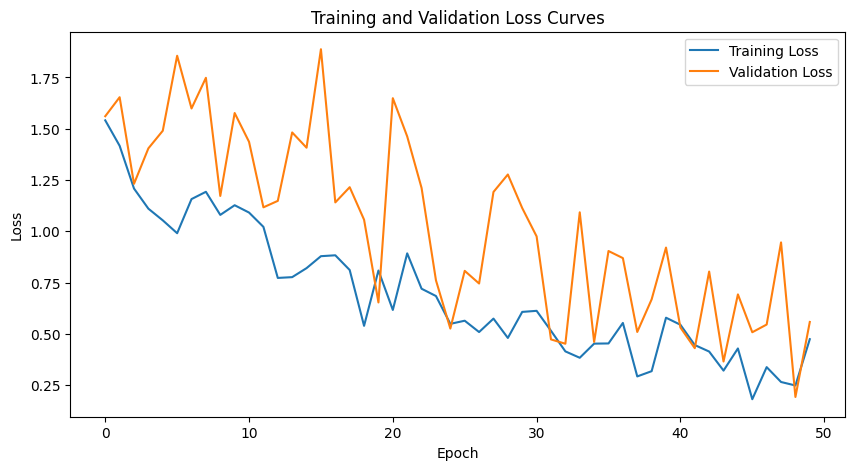

training:  128 test:  16 validation:  16


/Users/kuyuanhao/Documents/Research Assistant/Interactive Organisms Lab/code/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Test Accuracy: 93.75%


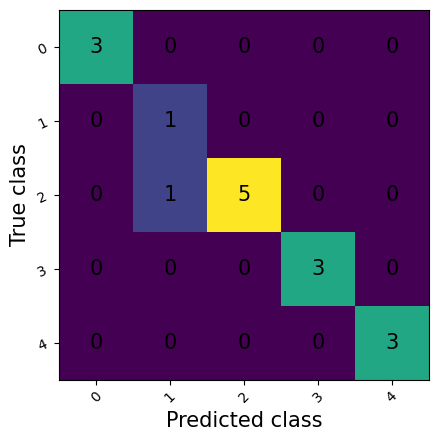

In [13]:
from evaluations import plotLossGraph, evaluation
from data_loader import dataLoader, original_dataLoader
from show_images import show_all_images
import os
import torch
from load_data import cleanDS_Store
torch.manual_seed(99)

# read the txt file from results folder
result_folder = './results/results_2024-05-15-p-train-pixel-test-canon'
train_losses = [float(line.strip()) for line in open(os.path.join(result_folder,'train_losses.txt'),'r')]
valid_losses = [float(line.strip()) for line in open(os.path.join(result_folder,'valid_losses.txt'),'r')]
plotLossGraph(train_losses,valid_losses)

full_path = './content/pixel/lips/'
base_path = full_path
cleanDS_Store(base_path)
train_loader, valid_loader, test_loader = dataLoader(base_path)

model_path = os.path.join(result_folder,'best.pth')

model, test_plots = evaluation(test_loader, model_path, model_type = 'resnet18')

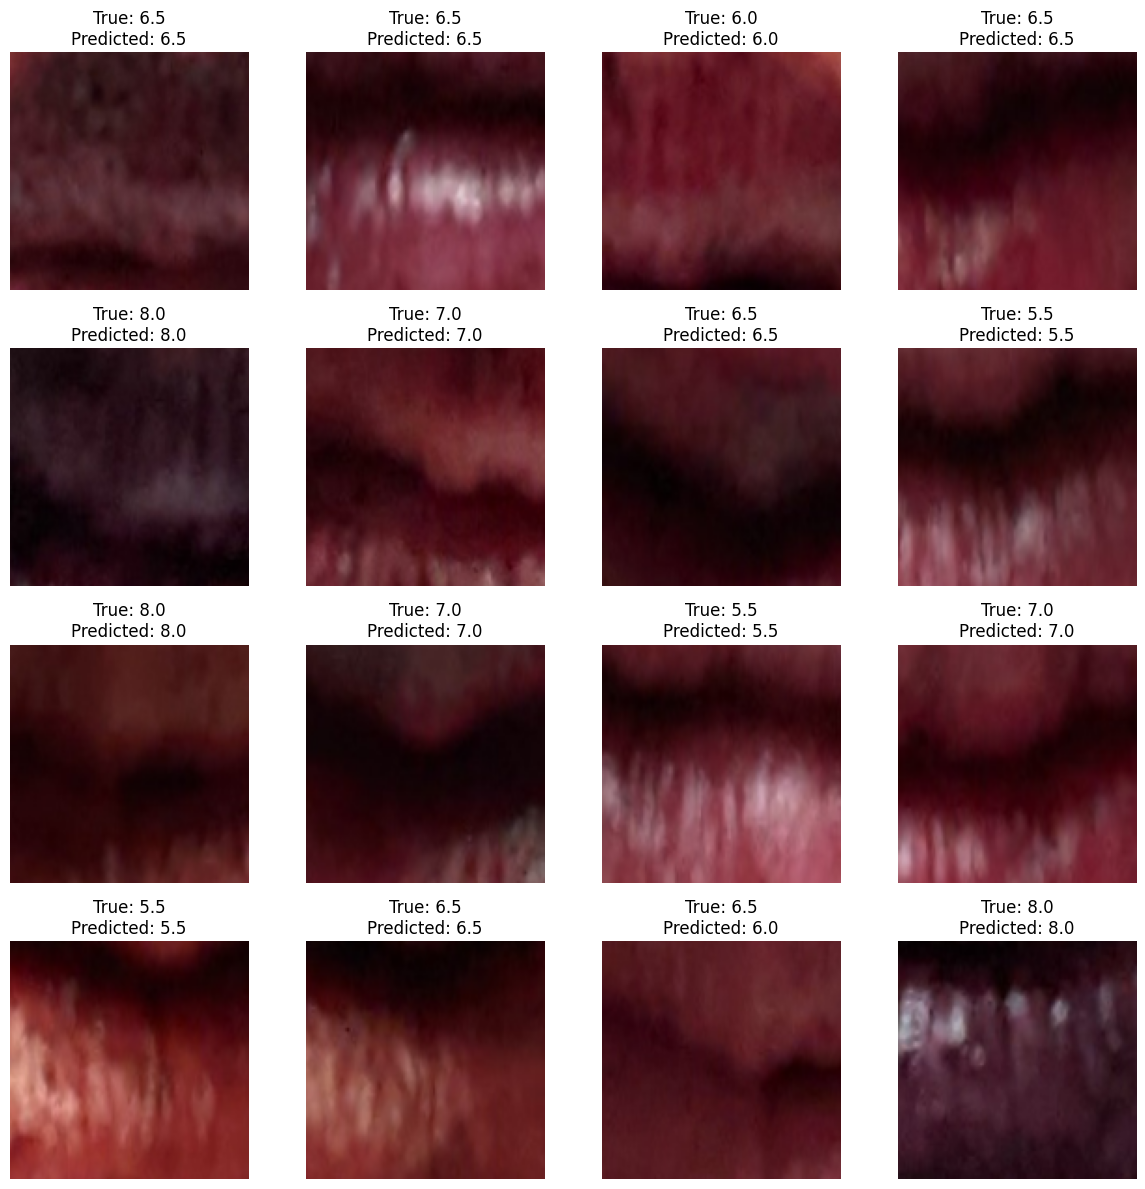

In [14]:
from show_images import show_evaluation_images
class_labels = ['5.5','6.0','6.5','7.0','8.0']
show_evaluation_images(test_plots, base_path, class_labels=class_labels, num_cols=4)

/Users/kuyuanhao/Documents/Research Assistant/Interactive Organisms Lab/code/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Test Accuracy: 50.00%


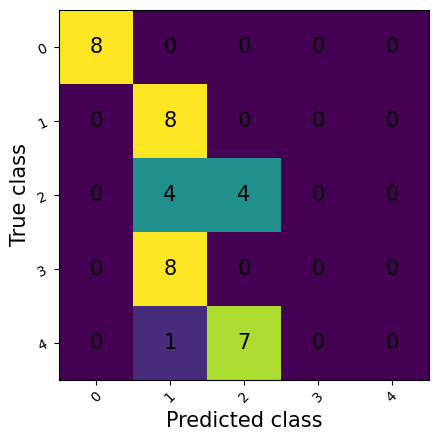

In [30]:
from data_loader import api_dataLoader
full_path = './content/TestShuyi/lips/'
base_path = full_path
# cleanDS_Store(base_path)
result_folder = './results/results_2024-05-15-p-train-pixel-test-canon'
model_path = os.path.join(result_folder,'best.pth')

loader = api_dataLoader(base_path)
model, test_plots = evaluation(loader, model_path, model_type = 'resnet18')


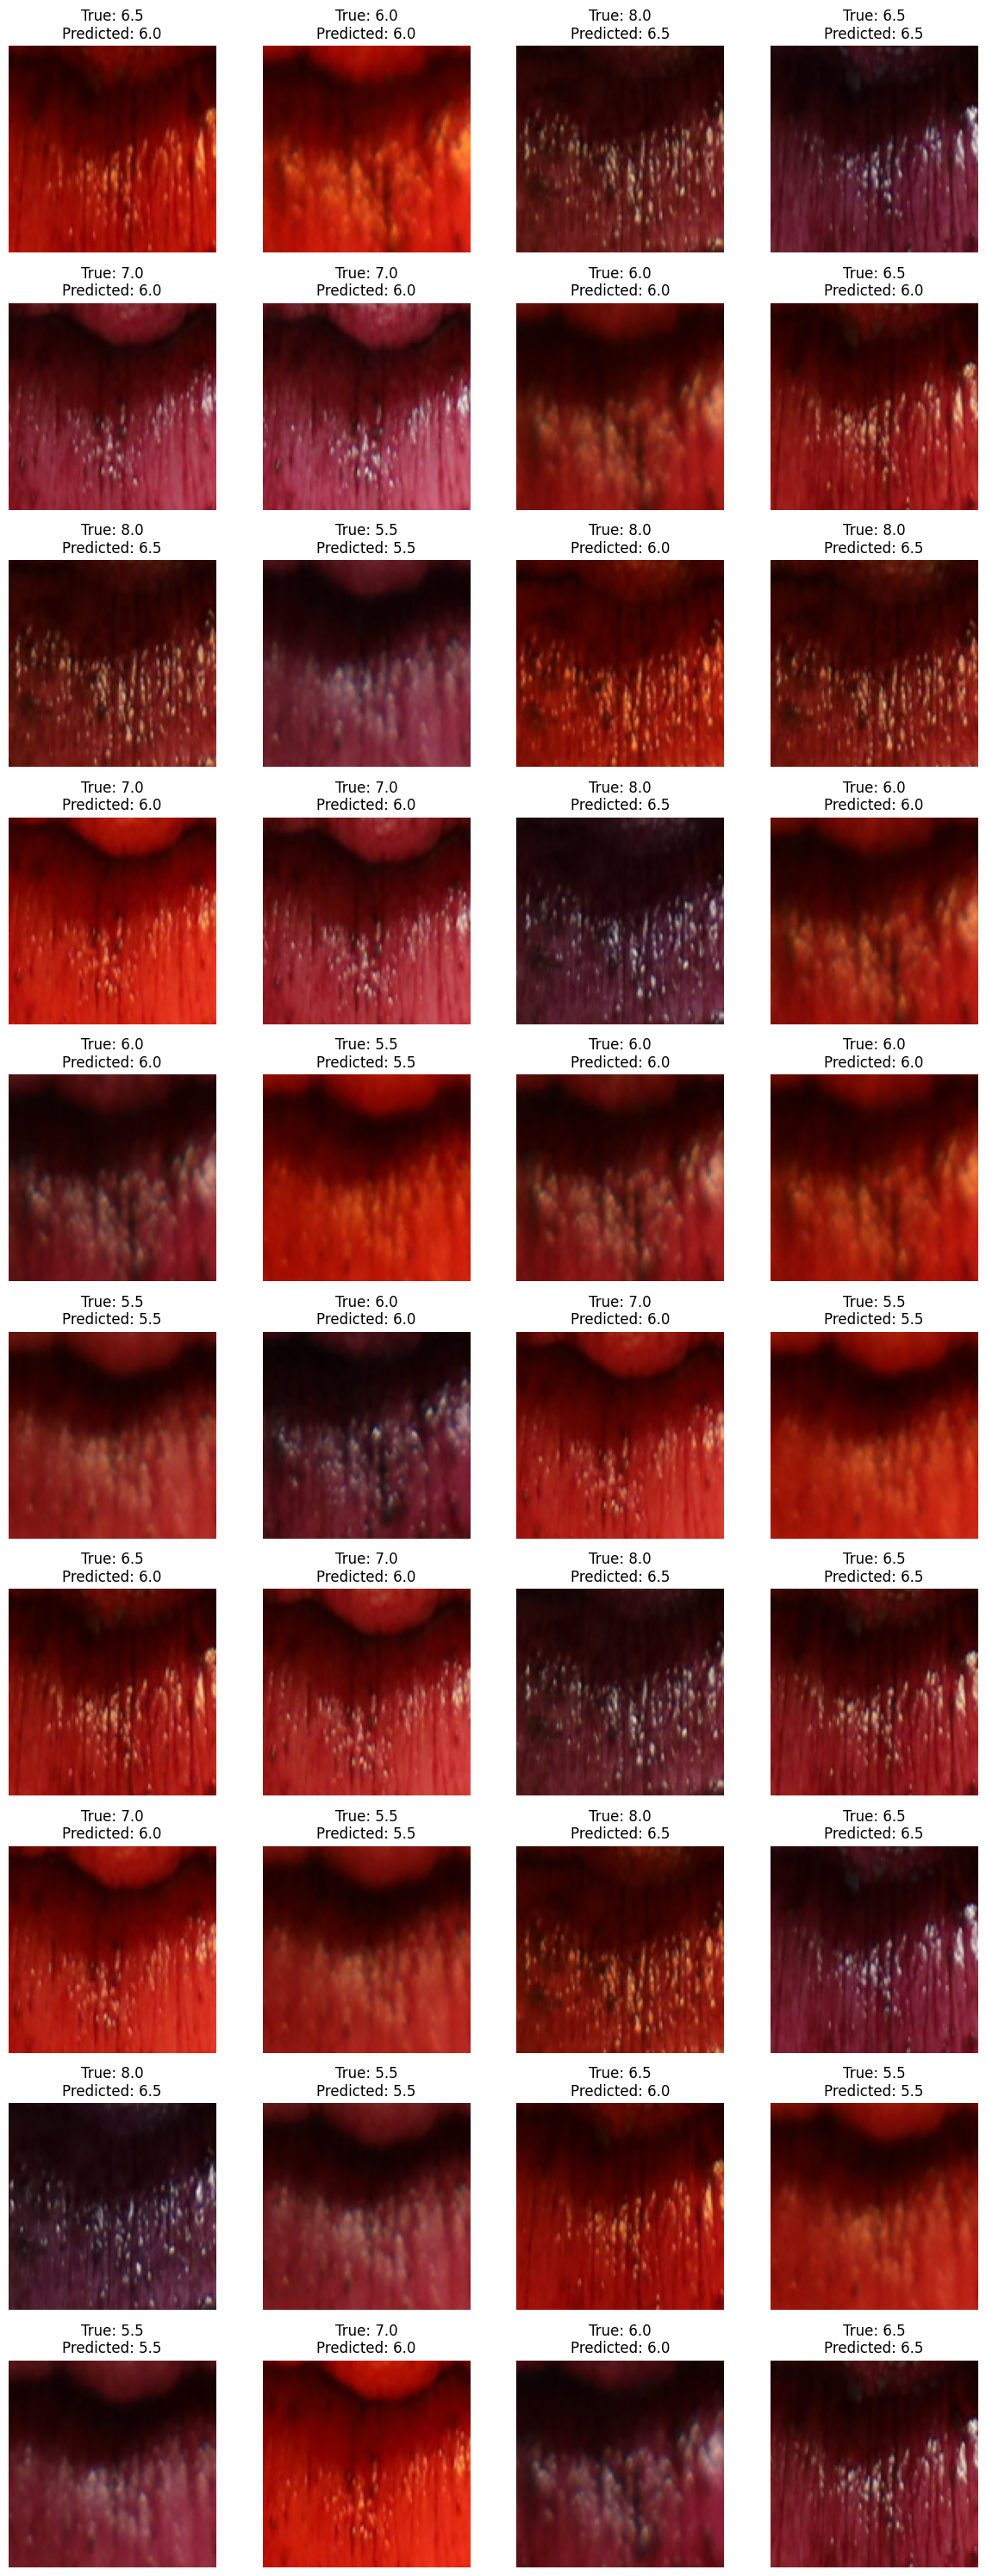

In [25]:
from show_images import show_evaluation_images
class_labels = ['5.5','6.0','6.5','7.0','8.0']
show_evaluation_images(test_plots, base_path, class_labels=class_labels, num_cols=4)